In [3]:
import os
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
hrd=pd.read_csv('C:\\Users\\royku\\Sem II Modules\\All Used Data\\hrdata1.csv')

In [5]:
hrd.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
hrd.isnull().sum() #Checking null data

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
hrd.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [8]:
hrd['sales'].unique().tolist() #Checking unusual column Sales as it does not fit with other provided features

['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']

In [9]:
hrd.rename(columns={'sales':'dept'},inplace=True) #removing sales column after with more suitable name

In [10]:
X=hrd.drop('left',axis=1)
Y=hrd['left'] #Creating dependent and independent dataset

In [11]:
X=pd.get_dummies(X) #Creating dummy variables by One hot encoding categorical features
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state = 300)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
clf=GradientBoostingClassifier(n_estimators=100,random_state=300) #Randomly making estimation of 100 tress.We will later check from Grid Search whts the best tree number

In [16]:
clf.fit(X_train,Y_train)

GradientBoostingClassifier(random_state=300)

In [17]:
clf.score(X_test,Y_test)

0.9753333333333334

#### Since there is no bootstrapping sample taken during boosting algo we will not consider Out of Bag Errors. So we will go by GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
mod=GridSearchCV(clf,param_grid={'n_estimators':[60,80,100,120,140,160]})
mod.fit(X_train,Y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=300),
             param_grid={'n_estimators': [60, 80, 100, 120, 140, 160]})

In [20]:
mod.score(X_test,Y_test)

0.977

In [21]:
mod.best_estimator_ #So the best mod is with n_estimators=160

GradientBoostingClassifier(n_estimators=160, random_state=300)

In [22]:
clf=GradientBoostingClassifier(n_estimators=160,random_state=300)
clf.fit(X_train,Y_train)

GradientBoostingClassifier(n_estimators=160, random_state=300)

In [23]:
clf.score(X_test,Y_test)

0.977

In [24]:
clf.feature_importances_ #We can generate the feature importance

array([5.41572424e-01, 9.03061591e-02, 1.10685889e-01, 7.67061760e-02,
       1.77002176e-01, 1.26237842e-03, 0.00000000e+00, 2.04495356e-04,
       7.11983309e-05, 6.69810962e-06, 3.96011296e-05, 0.00000000e+00,
       0.00000000e+00, 1.72364228e-04, 6.28205216e-06, 1.70513124e-04,
       2.71051104e-04, 3.37546285e-04, 1.18504714e-03, 0.00000000e+00])

In [25]:
feature_imp=pd.Series(clf.feature_importances_,index=X.columns)
feature_imp.sort_values(ascending=False)

satisfaction_level       0.541572
time_spend_company       0.177002
number_project           0.110686
last_evaluation          0.090306
average_montly_hours     0.076706
Work_accident            0.001262
salary_low               0.001185
salary_high              0.000338
dept_technical           0.000271
dept_IT                  0.000204
dept_product_mng         0.000172
dept_support             0.000171
dept_RandD               0.000071
dept_hr                  0.000040
dept_accounting          0.000007
dept_sales               0.000006
promotion_last_5years    0.000000
dept_management          0.000000
dept_marketing           0.000000
salary_medium            0.000000
dtype: float64

<AxesSubplot:>

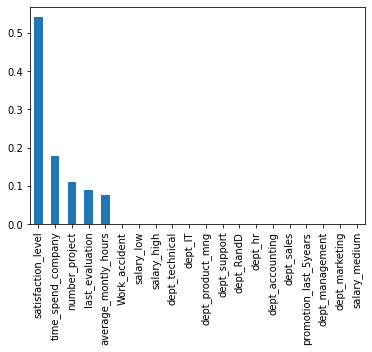

In [26]:
feature_imp.sort_values(ascending=False).plot(kind='bar')

### Checking on Partial Dependence Plot

In [27]:
from sklearn.inspection import plot_partial_dependence

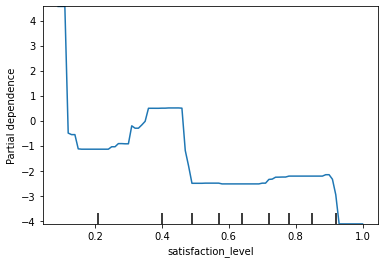

In [31]:
fig=plot_partial_dependence(clf, X, [0],feature_names=X.columns.tolist())